<a href="https://colab.research.google.com/github/venidaydream/Intro_to_Big_Data/blob/main/big_data_3_entrega_IBEX35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considerando la información siguiente  para el IBEX 35, seleccione 5 stocks y rango amplio de fechas en que hayan cotizado los 5 y haga el análisis descriptivo.


- que conclusión a nivel financiero se obtiene de cada stock?

- Busque en internet como hacer la matriz de correlación de los precios de los 5 stocks. (mapa de calor)

- Seleccione 3 stocks con los que formaría una cartera y justifique porque esa selección.

In [28]:
import pandas as pd
import datetime
import yfinance as yf

#elegir acciones
# ACCIONA, SOLARIA ENERGIA, AENA, CAIXABANK, BBVA
symbol = ['ANA.MC','SLR.MC','AENA.MC','CABK.MC','BBVA.MC']
stocks = yf.download(symbol)
stocks_adj = stocks['Adj Close']
stocks_adj.head()

[*********************100%%**********************]  5 of 5 completed


,AENA.MC,ANA.MC,BBVA.MC,CABK.MC,SLR.MC
Date,,,,,
2000-01-03,NaN,0.062566,4.656138,NaN,NaN
2000-01-04,NaN,0.058175,4.534645,NaN,NaN
2000-01-05,NaN,0.055705,4.432853,NaN,NaN
2000-01-06,NaN,NaN,4.432853,NaN,NaN
2000-01-07,NaN,0.057517,4.488676,NaN,NaN


In [29]:
#ver las fechas de las acciones originales
symbol_dates = ['ANA','SLR','AENA.MC','CABK','BBVA']
stocks_dates = yf.download(symbol_dates)
stocks_dates_adj = stocks_dates['Adj Close']
for columna in stocks_dates_adj.columns:
    primer_indice_con_informacion = stocks_dates_adj[columna].first_valid_index()
    ultimo_indice_no_nulo = stocks_dates_adj[columna].last_valid_index()
    print(f"para '{columna}': inicia en  {primer_indice_con_informacion} y finaliza en {ultimo_indice_no_nulo}")

[*********************100%%**********************]  5 of 5 completed
para 'AENA.MC': inicia en  2015-02-11 00:00:00 y finaliza en 2023-10-20 00:00:00
para 'ANA': inicia en  2018-07-05 00:00:00 y finaliza en 2022-03-02 00:00:00
para 'BBVA': inicia en  1988-12-15 00:00:00 y finaliza en 2023-10-20 00:00:00
para 'CABK': inicia en  2001-10-09 00:00:00 y finaliza en 2022-03-02 00:00:00
para 'SLR': inicia en  1996-08-13 00:00:00 y finaliza en 2018-06-28 00:00:00


In [30]:
#elegir las fechas de las acciones MC - los ultimos 3 años
start_date = "2020-01-01"
end_date = "2023-10-22"

stocks1 = yf.download(symbol, start=start_date, end=end_date)
stocks_df2 = stocks1['Adj Close']
stocks_df2.tail()

[*********************100%%**********************]  5 of 5 completed


,AENA.MC,ANA.MC,BBVA.MC,CABK.MC,SLR.MC
Date,,,,,
2023-10-16,139.550003,118.000000,7.700,3.792,14.270
2023-10-17,141.000000,118.650002,7.744,3.788,14.175
2023-10-18,140.050003,119.300003,7.688,3.780,14.150
2023-10-19,139.949997,119.250000,7.624,3.854,13.900
2023-10-20,137.350006,115.349998,7.540,3.800,13.725


**Volatilidad**

Calcular la volatilidad histórica de las acciones te ayudaría a comprender cuán fluctuantes han sido los precios. Esto es importante para la gestión de riesgos y para determinar la idoneidad de la inversión.

In [31]:
stocks_df2.agg(["mean","median","max","min","std","var"])

,AENA.MC,ANA.MC,BBVA.MC,CABK.MC,SLR.MC
mean,131.162545,135.080584,4.457379,2.594475,16.061346
median,134.003571,133.397888,4.433294,2.439522,16.150000
max,157.915054,203.975601,7.798000,3.868000,30.940001
min,83.165573,71.098579,1.829429,1.344590,6.100000
std,13.432203,34.757914,1.438710,0.728939,4.055876
var,180.424074,1208.112584,2.069885,0.531353,16.450133


In [32]:
stocks_df2.describe()

,AENA.MC,ANA.MC,BBVA.MC,CABK.MC,SLR.MC
count,977.000000,977.000000,977.000000,977.000000,977.000000
mean,131.162545,135.080584,4.457379,2.594475,16.061346
std,13.432203,34.757914,1.438710,0.728939,4.055876
min,83.165573,71.098579,1.829429,1.344590,6.100000
25%,120.535385,105.212646,3.656317,2.038139,13.960000
50%,134.003571,133.397888,4.433294,2.439522,16.150000
75%,141.125229,168.028366,5.149588,3.221163,18.330000
max,157.915054,203.975601,7.798000,3.868000,30.940001


In [33]:
print('tamaño de la base:',stocks_df2.shape,
      '\n MEDIDAS DE TENDENCIA CENTRAL',
     '\n media:',stocks_df2.mean(),
     '\n mediana:',stocks_df2.median(),
     '\n moda:\n',stocks_df2.mode(),
     )


tamaño de la base: (977, 5) 
 MEDIDAS DE TENDENCIA CENTRAL 
 media: AENA.MC    131.162545
ANA.MC     135.080584
BBVA.MC      4.457379
CABK.MC      2.594475
SLR.MC      16.061346
dtype: float64 
 mediana: AENA.MC    134.003571
ANA.MC     133.397888
BBVA.MC      4.433294
CABK.MC      2.439522
SLR.MC      16.150000
dtype: float64 
 moda:
       AENA.MC     ANA.MC   BBVA.MC   CABK.MC     SLR.MC
0  134.003571  134.64444  3.453894  1.722700   9.800000
1         NaN  151.21460  4.601162  2.233479  14.090000
2         NaN        NaN       NaN  2.336946  14.910000
3         NaN        NaN       NaN  2.356570  15.800000
4         NaN        NaN       NaN  2.452902  17.150000
5         NaN        NaN       NaN  3.150995  17.540001
6         NaN        NaN       NaN  3.178127        NaN
7         NaN        NaN       NaN  3.613000        NaN
8         NaN        NaN       NaN  3.787000        NaN
9         NaN        NaN       NaN  3.826000        NaN


**Análisis de tendencias**

Un análisis inicial podría incluir la visualización de los precios históricos en un gráfico de líneas a lo largo del tiempo. Esto ayudaría a identificar tendencias generales, como si el precio de las acciones ha estado aumentando, disminuyendo o manteniéndose estable

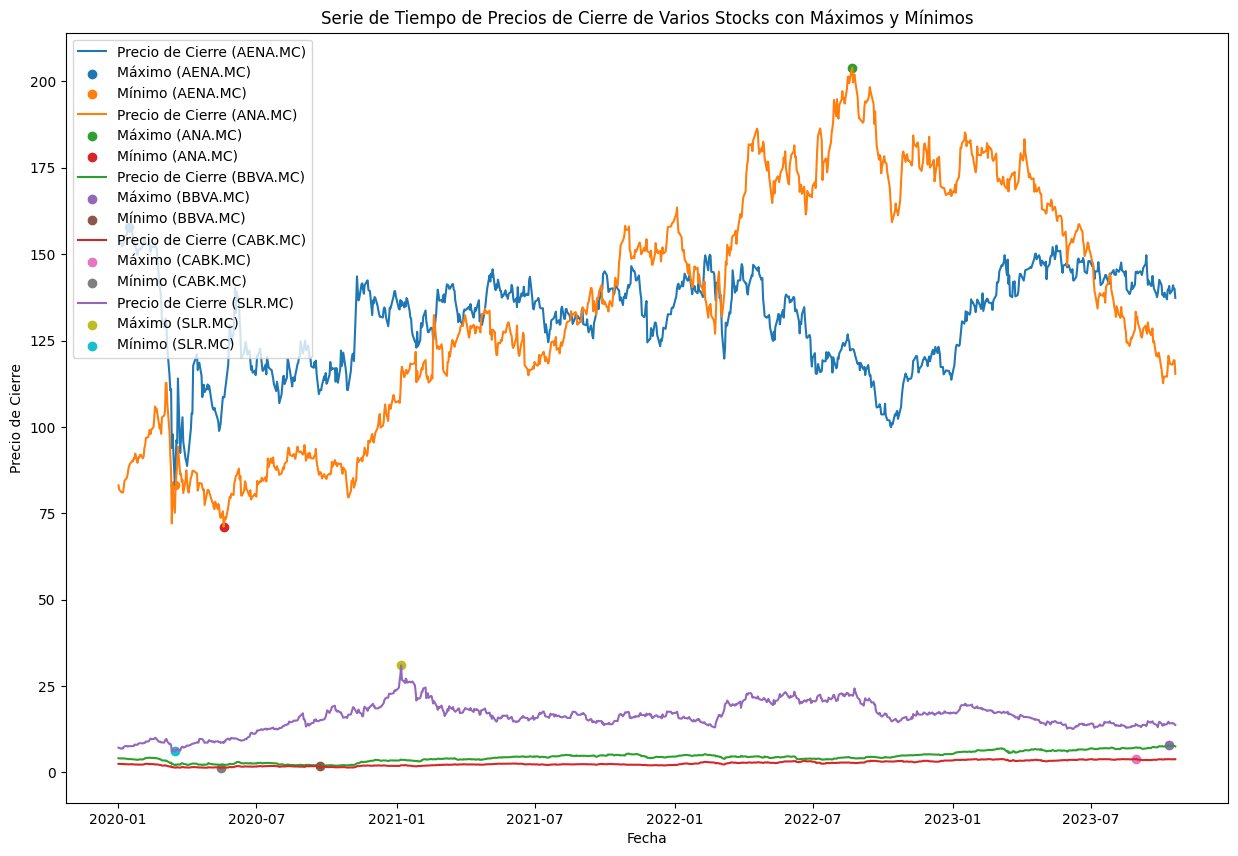

In [34]:
import matplotlib.pyplot as plt

# Tenemos 'stocks_df2' con las series de tiempo de varios stocks que denominamos data
# Cada clave es el nombre del stock y el valor es la serie de tiempo correspondiente

# Crear la gráfica de la serie de tiempo para cada stock
plt.figure(figsize=(15, 10))

for symbol, data in stocks_df2.items():
    plt.plot(data.index, data.values, label=f'Precio de Cierre ({symbol})')

    # Encontrar el máximo y mínimo de la serie de tiempo
    maximo = data.max()
    minimo = data.min()

    # Resaltar el máximo y mínimo en la gráfica
    plt.scatter(data.idxmax(), maximo, label=f'Máximo ({symbol})')
    plt.scatter(data.idxmin(), minimo, label=f'Mínimo ({symbol})')

# Configurar etiquetas y leyenda
plt.title('Serie de Tiempo de Precios de Cierre de Varios Stocks con Máximos y Mínimos')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()

# Mostrar la gráfica
plt.show()

[*********************100%%**********************]  2 of 2 completed


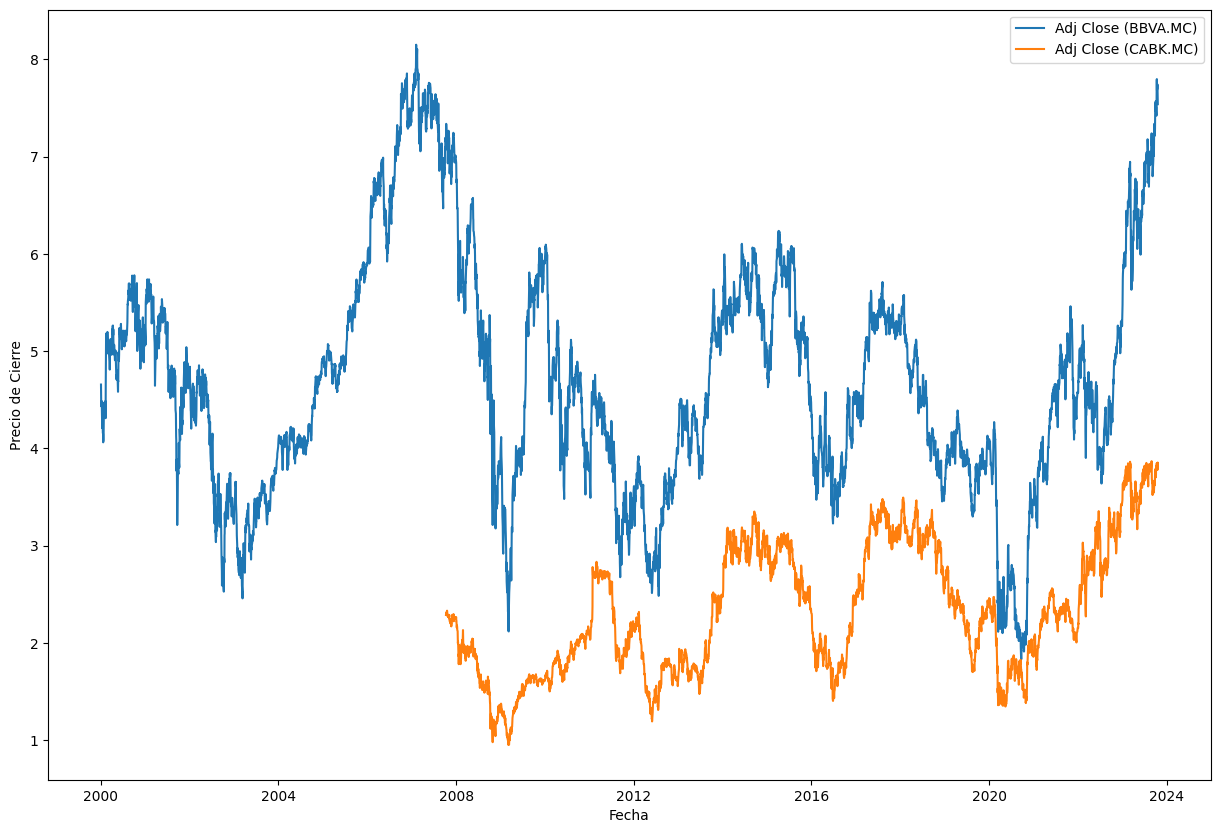

In [35]:
import matplotlib.pyplot as plt

# Me sorprendion los precios de los bancos y he hecho una grafica por separado
plt.figure(figsize=(15, 10))

symbol_banks = ['CABK.MC','BBVA.MC']
stocks_banks = yf.download(symbol_banks)
stocks_adj_banks = stocks_banks['Adj Close']
for symbol, data in stocks_adj_banks.items():
    plt.plot(data.index, data.values, label=f'Adj Close ({symbol})')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()

# Mostrar la gráfica
plt.show()

**Detectar outliers**

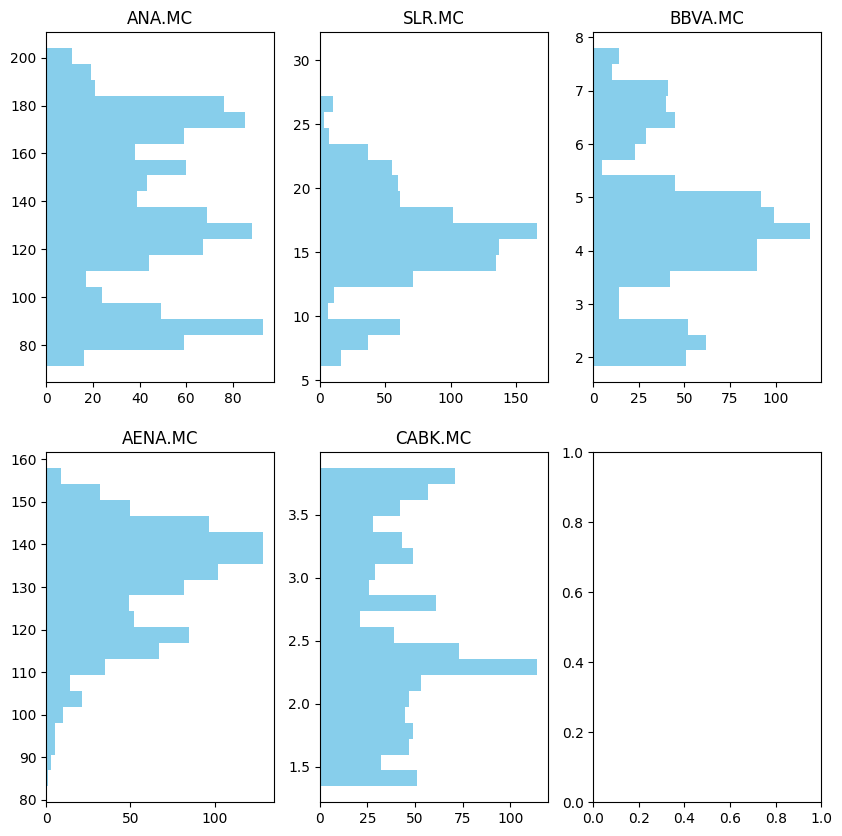

In [37]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

# ACCIONA, SOLARIA ENERGIA, AENA, CAIXABANK, BBVA
symbol = ['ANA.MC','SLR.MC','AENA.MC','CABK.MC','BBVA.MC']
axes[0, 0].hist(stocks_df2['ANA.MC'], bins=20, color='skyblue', orientation='horizontal')
axes[0, 0].set_title('ANA.MC')

axes[0, 1].hist(stocks_df2['SLR.MC'], bins=20, color='skyblue', orientation='horizontal')
axes[0, 1].set_title('SLR.MC')

axes[1, 0].hist(stocks_df2['AENA.MC'], bins=20, color='skyblue', orientation='horizontal')
axes[1, 0].set_title('AENA.MC')

axes[1, 1].hist(stocks_df2['CABK.MC'], bins=20, color='skyblue', orientation='horizontal')
axes[1, 1].set_title('CABK.MC')

axes[0, 2].hist(stocks_df2['BBVA.MC'], bins=20, color='skyblue', orientation='horizontal')
axes[0, 2].set_title('BBVA.MC')

plt.show()

In [38]:
symbol = ['ANA.MC','SLR.MC','AENA.MC','CABK.MC','BBVA.MC']
for i in symbol:
    Q1 = stocks_df2[i].quantile(0.25)
    Q3 = stocks_df2[i].quantile(0.75)

    # Calcular el IQR (Rango Intercuartil)
    IQR = Q3 - Q1

    # Definir los límites superior e inferior para identificar outliers
    limite_superior = Q3 + 1.5 * IQR
    limite_inferior = Q1 - 1.5 * IQR

    # Filtrar los outliers
    datos_filtrados = stocks_df2[i][(stocks_df2[i]>= limite_inferior) & (stocks_df2[i] <= limite_superior)]
    datos_max = stocks_df2[i][ (stocks_df2[i] >= limite_superior)]
    datos_min = stocks_df2[i][(stocks_df2[i]<= limite_inferior)]


    print(f'Reporte para {i}: datos_filtrados:{datos_filtrados.shape}, y registros iniciales {stocks_df2[i].shape} con {datos_max.shape} outliers superiores y {datos_min.shape} outliers inferiores')

Reporte para ANA.MC: datos_filtrados:(977,), y registros iniciales (977,) con (0,) outliers superiores y (0,) outliers inferiores
Reporte para SLR.MC: datos_filtrados:(944,), y registros iniciales (977,) con (15,) outliers superiores y (18,) outliers inferiores
Reporte para AENA.MC: datos_filtrados:(974,), y registros iniciales (977,) con (0,) outliers superiores y (3,) outliers inferiores
Reporte para CABK.MC: datos_filtrados:(977,), y registros iniciales (977,) con (0,) outliers superiores y (0,) outliers inferiores
Reporte para BBVA.MC: datos_filtrados:(960,), y registros iniciales (977,) con (17,) outliers superiores y (0,) outliers inferiores


**Encontrar los splits**

In [39]:
# Definir los símbolos de las acciones
symbol = ['ANA.MC','SLR.MC','AENA.MC','CABK.MC','BBVA.MC']

# Crear un diccionario para almacenar información sobre los splits
splits_info = {}

# Iterar a través de los símbolos y obtener información sobre los splits
for i in symbol:
    stock = yf.Ticker(i)
    splits = stock.splits
    splits_info[i] = splits

# Imprimir información sobre los splits
for symbol, splits in splits_info.items():
    print(f"Splits para {symbol}:")
    print(splits)



Splits para ANA.MC:
Series([], Name: Stock Splits, dtype: float64)
Splits para SLR.MC:
Series([], Name: Stock Splits, dtype: float64)
Splits para AENA.MC:
Series([], Name: Stock Splits, dtype: float64)
Splits para CABK.MC:
Series([], Name: Stock Splits, dtype: float64)
Splits para BBVA.MC:
Series([], Name: Stock Splits, dtype: float64)


In [40]:
# Definir los símbolos de las acciones originales porque con MC no ha habido splits
symbol_dates = ['ANA','SLR','AENA.MC','CABK','BBVA']

# Crear un diccionario para almacenar información sobre los splits
splits_info = {}

# Iterar a través de los símbolos y obtener información sobre los splits
for i in symbol_dates:
    stock = yf.Ticker(i)
    splits = stock.splits
    splits_info[i] = splits

# Imprimir información sobre los splits
for symbol_dates, splits in splits_info.items():
    print(f"Splits para {symbol_dates}:")
    print(splits)



Splits para ANA:
Series([], Name: Stock Splits, dtype: float64)
Splits para SLR:
Series([], Name: Stock Splits, dtype: float64)
Splits para AENA.MC:
Series([], Name: Stock Splits, dtype: float64)
Splits para CABK:
Series([], Name: Stock Splits, dtype: float64)
Splits para BBVA:
Date
1997-07-22 00:00:00-04:00    3.000000
1998-07-14 00:00:00-04:00    3.000000
2009-04-07 00:00:00-04:00    1.016100
2011-03-29 00:00:00-04:00    1.016949
Name: Stock Splits, dtype: float64


**Seleccionar el dia del split**

 De mi seleccion de acciones solo BBVA ha tenido stock splits:

1997-07-22   - 3.0

1998-07-14   - 3.0

2009-04-07   - 1.0

2011-03-29   - 1.0

In [51]:
#ver las fechas de las acciones originales
symbol_dates = ['ANA','SLR','AENA.MC','CABK','BBVA']
stocks_dates = yf.download(symbol_dates)
stocks_dates_adj = stocks_dates['Adj Close']

#AENA y ANA todavia no han salido al bolsa el 29-marzo-2011
split1 = stocks_dates[(stocks_dates.index.day == 29)& (stocks_dates.index.month == 3) & (stocks_dates.index.year == 2011)  ]
print(split1)

[*********************100%%**********************]  5 of 5 completed
           Adj Close                               Close                      \
             AENA.MC ANA      BBVA     CABK  SLR AENA.MC ANA   BBVA     CABK   
Date                                                                           
2011-03-29       NaN NaN  6.487668  1.54444  3.5     NaN NaN  12.28  1.54444   

                 ...    Open                           Volume                 \
            SLR  ... AENA.MC ANA   BBVA     CABK  SLR AENA.MC ANA       BBVA   
Date             ...                                                           
2011-03-29  3.5  ...     NaN NaN  12.23  1.52778  3.5     NaN NaN  1197800.0   

                             
              CABK      SLR  
Date                         
2011-03-29  2880.0  24110.0  

[1 rows x 30 columns]


In [52]:
split1.xs('BBVA', level=1, axis=1)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2011-03-29,6.487668,12.28,12.3,12.15,12.23,1197800.0


**Seleccionar un rango de fechas ('BBVA')**

Como era el precio del stock unos dias antes y unos despues del split?

In [53]:
fecha = pd.to_datetime('2011-03-29')

inicio = fecha - pd.DateOffset(4)
fin = fecha + pd.DateOffset(3)

# Utilizar selección para filtrar el rango de fechas
datos_seleccionados = stocks_dates.loc[inicio:fin]
datos_seleccionados.xs('BBVA', level=1, axis=1)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2011-03-25,6.393185,12.311333,12.458833,12.2720,12.429333,1431458.0
2011-03-28,6.388078,12.301500,12.468667,12.3015,12.380167,1840576.0
2011-03-29,6.487668,12.280000,12.300000,12.1500,12.230000,1197800.0
2011-03-30,6.440119,12.190000,12.220000,12.0700,12.140000,1507800.0
2011-03-31,6.339738,12.000000,12.050000,11.9000,11.920000,1747000.0
2011-04-01,6.440119,12.190000,12.250000,11.9700,12.070000,1049900.0


**Estacionalidad**

La estacionalidad se refiere a patrones recurrentes que ocurren en un ciclo fijo de tiempo, como las estaciones del año o los meses del año.

Prueba de Dickey-Fuller Aumentada (ADF): Esta prueba se utiliza para evaluar si una serie de tiempo es estacionaria en el sentido de que no tiene una raíz unitaria. Si se rechaza la hipótesis nula en la prueba ADF, sugiere que la serie de tiempo es estacionaria.

Ho: la serie no es estacionaria

H1: la serie es estacionaria

In [54]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


symbol = ['ANA.MC','SLR.MC','AENA.MC','CABK.MC','BBVA.MC']

for i in symbol:
    # Crear la serie de tiempo
    stock=stocks_df2[i]
    serie_temporal = pd.Series(stock)

    # Realizar la prueba ADF
    resultado_adf = sm.tsa.adfuller(serie_temporal)
    # Extraer los resultados de la prueba ADF
    adf_estadística, p_valor, lags, nobs, valores_críticos, regresión_estimada = resultado_adf
    # Imprimir los resultados
    print(f'Valor p:de {i}: {p_valor}')

Valor p:de ANA.MC: 0.5539645155760988
Valor p:de SLR.MC: 0.0911352470423602
Valor p:de AENA.MC: 0.028198758808758013
Valor p:de CABK.MC: 0.8313333688975919
Valor p:de BBVA.MC: 0.9553385129479579
